# **Homework - Lab 2**
#### Szymon Pająk

## **Mathematical Model of Advection-Diffusion**  

The advection-diffusion equation describes the transport of a substance in a medium where both diffusion and advection occur. This equation models processes like pollutant dispersion in air or water, heat conduction in moving fluids, and chemical transport in environmental systems.  

The analytical solution for the concentration $c(x,t)$ of a substance at position $x$ and time $t$ is given by:  

$$
c(x,t) = \frac{M}{A} \cdot \frac{1}{2\sqrt{\pi D t}} \cdot \exp\left[-\frac{(v t - x)^2}{4Dt}\right]
$$

where:  
- $M$ (kg) is the total mass of the substance initially present.  
- $A$ (m²) is the cross-sectional area, distributing the mass over a specific region.  
- $D$ (m²/s) is the diffusion coefficient, which characterizes how quickly the substance spreads due to random motion.  
- $v$ (m/s) is the advection velocity, representing the speed at which the substance is carried by the medium (e.g., wind or water flow).  

### **Interpretation of the Solution**  

The solution represents a Gaussian profile that evolves over time:  
- The peak of the distribution moves with velocity $v$, meaning the concentration is transported in the positive $x$-direction.  
- Diffusion causes the distribution to spread out over time, controlled by the term $\sqrt{4Dt}$, which determines the width of the profile.  
- The exponential term defines a bell-shaped curve centered at $x = v t$, showing the highest concentration where the substance was advected.  
- The prefactor $\frac{1}{2\sqrt{\pi D t}}$ ensures that mass is conserved while accounting for the increasing spread.  

### **Context: Understanding the Axes and Units**  

In the given plot, the axes represent:  
- **$x$-axis (s):** Time elapsed since the initial release.  
- **$c(x,t)$-axis (kg/m³):** Concentration of the substance at a given time.   

The plot visualizes how a localized release of a substance spreads and moves over time.


## **Analytic solution**

In [197]:
import pint
import numpy as np
import matplotlib.pyplot as plt

In [198]:
si = pint.UnitRegistry()

M = 0.075 * si.kilograms
A = 0.23 * si.meter**2
v = 0.3 * si.meter / si.second
D = 0.1 * si.meter**2 / si.second

SIM_TIME = 100

In [199]:
def c(x, t):
    
    if not isinstance(x, si.Quantity):
        x = x * si.meter
        
    if not isinstance(t, si.Quantity):
        t = t * si.sec

    f1 = M / A
    f2 = 1 / (2* np.sqrt(np.pi * D * t))
    f3 = np.exp(-((v * t - x)**2 / (4 * D * t)).to_base_units().magnitude)
    
    res = f1 * f2 * f3
    
    return res

In [200]:
x_values = np.linspace(1, SIM_TIME, 1000) * si.sec
y_values = c(15, x_values)

## **Final plot**

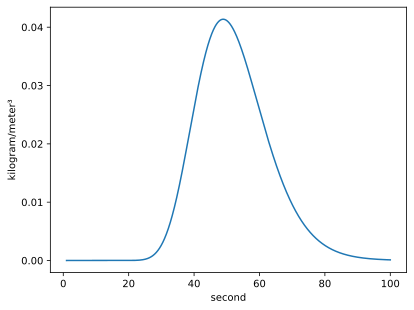

In [201]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
si.setup_matplotlib()

plt.plot(x_values, y_values)
plt.show()